# Empty-space based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from methods.method_empty_space import empty_space_denoising
from benchmark_demo.SignalBank import SignalBank

C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-test\src\benchmark_demo\SignalBank.py:1173: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


snr_out:30.0
[0 0 0 ... 0 0 0]
10


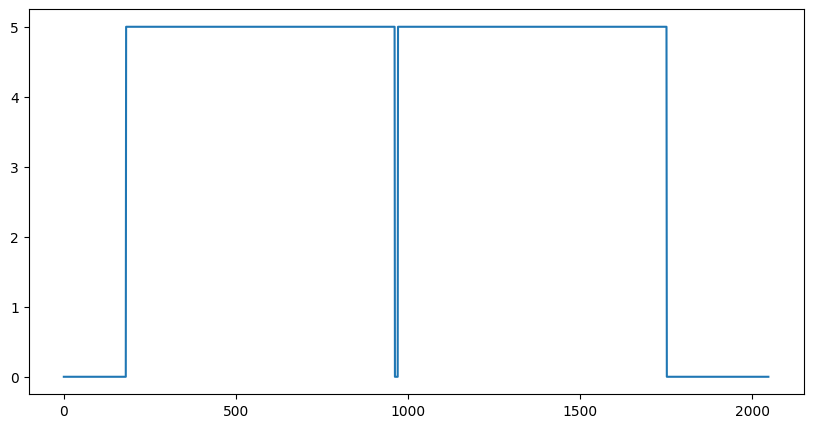

In [2]:
np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**11
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax

# s = sbank.signal_mc_synthetic_mixture_3()
# s = sbank.signal_cos_chirp()
# s = sbank._signal_exp_chirp()
# s = sbank.signal_mc_on_off_2()
# s = sbank.signal_linear_chirp()
# comp1 = sbank.signal_linear_chirp(a=0.1, b=0.15, instfreq = False)
# comp2 = sbank.signal_linear_chirp(a=0.1, b=0.25, instfreq = False)
# s = comp1+comp2
# s = sbank.signal_mc_parallel_chirps_unbalanced()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_pure_tones()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_cos_2()
# s = sbank.signal_mc_multi_linear_2()
s = sbank.signal_mc_synthetic_mixture_4()
# s = sbank.signal_mc_synthetic_mixture_4()
# s = sbank.signal_mc_impulses()

signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub)

print(signal.ncomps)
print(signal.total_comps)

fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(signal.ncomps)
plt.show()

In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
radius = 0.9
test_params = { 'fun':'Fest', 'correction':'rs', 'transform':'asin(sqrt(.))', 'rmin':0.65,'rmax':1.05}
output = empty_space_denoising(signal,
                                radi_seg=radius,
                                radi_expand=radius,
                                adapt_thr=True,
                                test_params=test_params,
                                return_dic=True)

s_r, mask = (output[key] for key in ('s_r','mask')) 

s_r_e = s_r[tmin:tmax]
s_e = s[tmin:tmax]                                    
print("QRF={}".format(10*np.log10((np.sum(s_e**2))/(np.sum((s_e-s_r_e)**2)))))

0.87457275390625
QRF=34.0268802648457


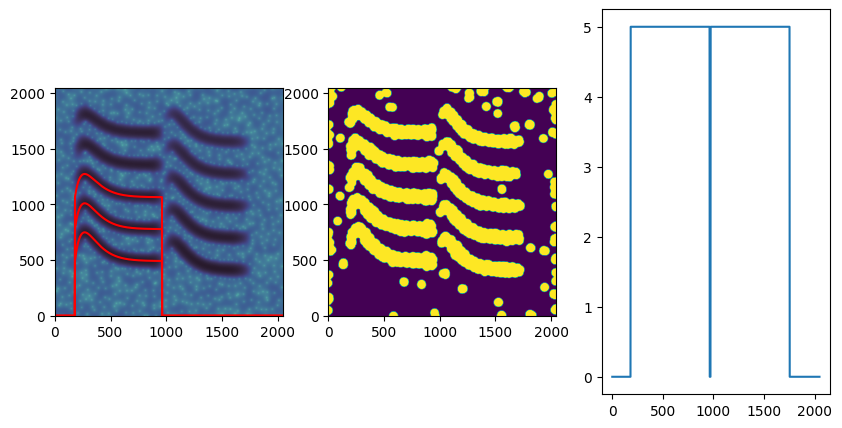

In [4]:
fig, ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
ax[0].plot(signal.instf[0]*Nfft,'r')
ax[0].plot(signal.instf[1]*Nfft,'r')
ax[0].plot(signal.instf[2]*Nfft,'r')
ax[2].plot(signal.ncomps)
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()